# Pixel parsing by grid(2304 pixels per image)

In [25]:
# using 40 x 40 grid in 2560 x 1440 resolution phones
# using 30 x 30 grid in 1920 x 1080 resolution phones
# will work fine!

In [26]:
from PIL import Image
import numpy as np
import pandas as pd

In [27]:
#example will be 1920 x 1080 images
im = Image.open('Character.jpg', 'r') #image that has lots of color 
# im = Image.open('City.jpg', 'r') # image that has lots of black

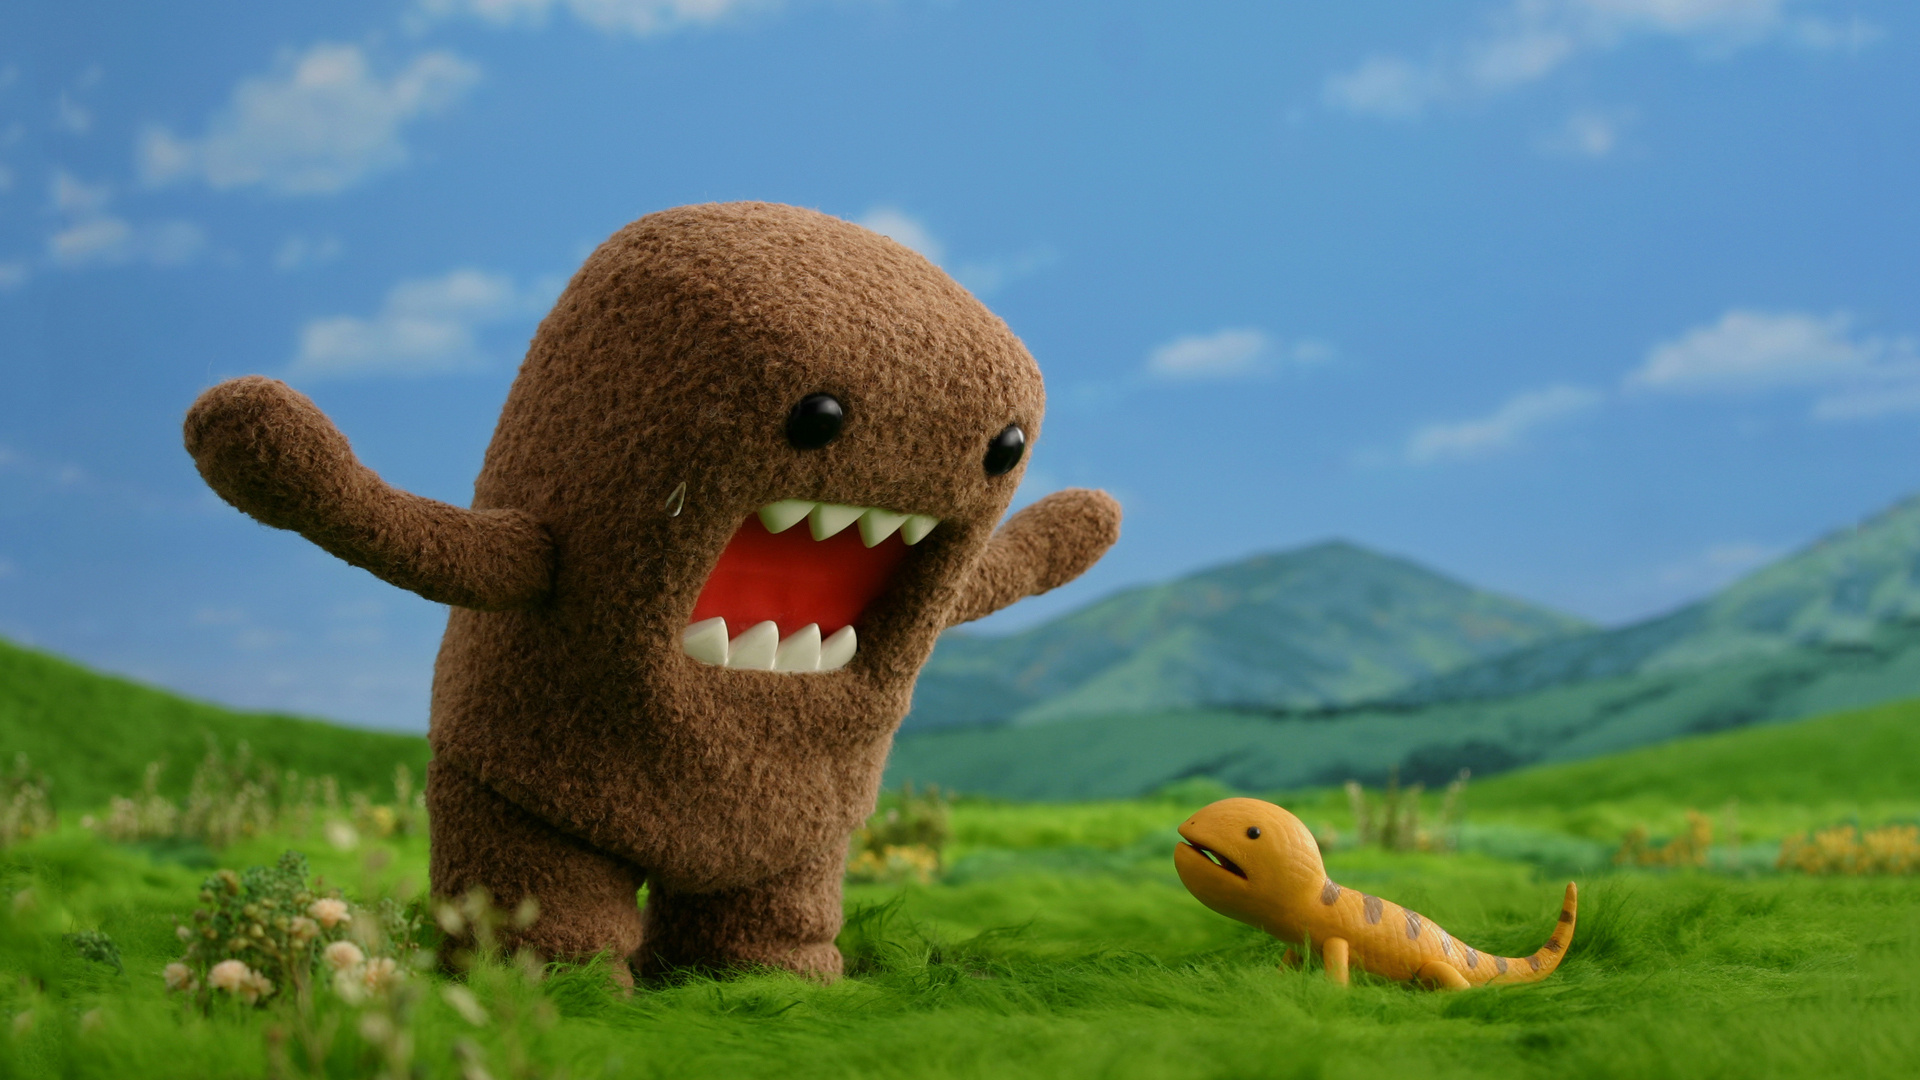

In [28]:
im

In [29]:
x, y = im.size
print(x, y)

1920 1080


In [30]:
# in case of y > x
if y > x:
    im = im.rotate(90)

if x >= 64 and y >= 36:
    x_delta=64
    y_delta=36
else:
    x_delta=x
    y_delta=y
counting_pixels = (x_delta*y_delta) # will be 2304 for almost all resolutions

### Creating 2304 pixel windows with end pixel

In [31]:
all_pixel = im.load()
x_offset = x//x_delta
y_offset = y//y_delta
pixels = []
for i in range(x_delta):
    for j in range(y_delta):
        pixels.append(all_pixel[(i+1)*x_offset-1,(j+1)*y_offset-1])
        #print((i+1)*x_offset-1,(j+1)*y_offset-1)

In [32]:
end = pd.DataFrame(pixels)

In [33]:
end.rename(columns={0: 'R', 1: 'G', 2: 'B'}, inplace=True)

In [34]:
end

,R,G,B
0,81,129,178
1,79,131,179
2,78,132,178
3,80,132,180
4,80,132,180
5,82,132,181
6,82,133,180
7,82,132,181
8,91,140,183
9,77,127,176


### Creating 2304 pixel window with center pixel

In [35]:
all_pixel = im.load()
x_offset = x//x_delta
y_offset = y//y_delta
pixels = []
for i in range(x_delta):
    for j in range(y_delta):
        pixels.append(all_pixel[i*x_offset+x_offset//2,j*y_offset+y_offset//2])
        #print(i*x_offset+x_offset//2,j*y_offset+y_offset//2)

In [36]:
center = pd.DataFrame(pixels)

In [37]:
center.rename(columns={0: 'R', 1: 'G', 2: 'B'}, inplace=True)

In [38]:
#center

### Counting Colors usage

In [39]:
Red = [0 for i in range(256)]
Green = [0 for i in range(256)]
Blue = [0 for i in range(256)]
for index, row in end.iterrows():
    Red[row['R']]+=1
    Green[row['G']]+=1
    Blue[row['B']]+=1

In [41]:
index=0
for number in Red:
    if number>1:
        print("Red in"+str(index)+"/255 is used for "+str(number)+" times")
    index+=1

Red in9/255 is used for 2 times
Red in11/255 is used for 2 times
Red in12/255 is used for 2 times
Red in13/255 is used for 3 times
Red in14/255 is used for 3 times
Red in17/255 is used for 2 times
Red in21/255 is used for 2 times
Red in22/255 is used for 3 times
Red in23/255 is used for 3 times
Red in24/255 is used for 4 times
Red in25/255 is used for 8 times
Red in26/255 is used for 8 times
Red in27/255 is used for 5 times
Red in30/255 is used for 4 times
Red in31/255 is used for 7 times
Red in32/255 is used for 2 times
Red in33/255 is used for 7 times
Red in34/255 is used for 7 times
Red in36/255 is used for 4 times
Red in37/255 is used for 3 times
Red in38/255 is used for 8 times
Red in39/255 is used for 4 times
Red in40/255 is used for 8 times
Red in41/255 is used for 7 times
Red in42/255 is used for 3 times
Red in43/255 is used for 7 times
Red in44/255 is used for 6 times
Red in45/255 is used for 4 times
Red in46/255 is used for 7 times
Red in47/255 is used for 4 times
Red in48/25